<a href="https://colab.research.google.com/github/SianC7/LAIDS/blob/main/PCA_1DCNN_(binary_classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CICIDS2017 Dataset

Extraction

In [22]:
import pandas as pd

# --- Data Collection ---

# Set pandas display options for wide output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Get Data file path
file_path = '/content/drive/MyDrive/Colab Notebooks/Honours Project/Datasets/cicids2017_cleaned.csv'
cicids2017_df = pd.read_csv(file_path, sep=",", comment="#", header=0)
cicids2017_df.columns = cicids2017_df.columns.str.strip()  # Strip whitespace from column names


print("\nInitial samples:")
print(f"cicids2017_df shape: {cicids2017_df.shape}")
# print(cicids2017_df.head().to_string())
# print(cicids2017_df.info())

# Print unique values and their counts for 'Attack Type'
print("\nAttack Type Distribution:")
print(cicids2017_df['Attack Type'].value_counts())

# --- Label Encoding ---

cicids2017_df['Attack Type'] = cicids2017_df['Attack Type'].apply(lambda x: 0 if x == 'Normal Traffic' else 1)


Initial samples:
cicids2017_df shape: (2520751, 53)

Attack Type Distribution:
Attack Type
Normal Traffic    2095057
DoS                193745
DDoS               128014
Port Scanning       90694
Brute Force          9150
Web Attacks          2143
Bots                 1948
Name: count, dtype: int64


#Data Split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# --- Train/val/test split ---
# Split label from datafram
X = cicids2017_df.drop('Attack Type', axis=1)
y = cicids2017_df['Attack Type']

# Split Data
X_temp, X_test, y_temp, y_test= train_test_split(X, y, test_size=0.3, random_state=42, stratify = y) #test_size was 0.4
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42, stratify = y_temp)

# Shuffle the data
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)


Visualisation of split

Input Shapes -> Train: (1411620, 52), Val: (352905, 52), Test: (756226, 52)
Labels[Benign, Mal] -> Train: [1173231  238389], Val: [293308  59597], Test: [628518 127708]


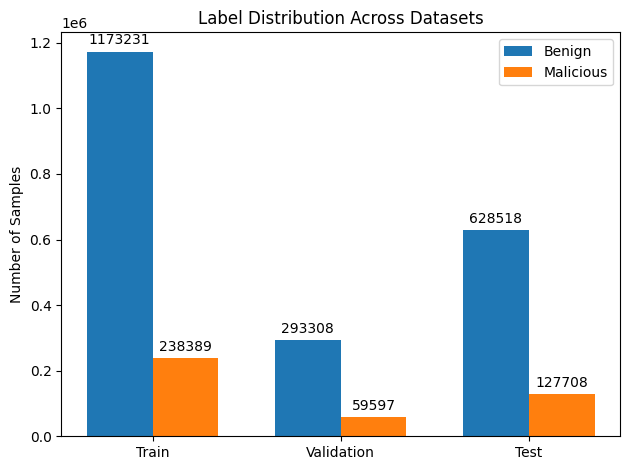

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# --- Visualisation ---
print(f"Input Shapes -> Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
print(f"Labels[Benign, Mal] -> Train: {np.bincount(y_train)}, Val: {np.bincount(y_val)}, Test: {np.bincount(y_test)}")

train_counts = np.bincount(y_train)
val_counts = np.bincount(y_val)
test_counts = np.bincount(y_test)

# Data for plotting
labels = ['Benign', 'Malicious']
datasets = ['Train', 'Validation', 'Test']
counts = [train_counts, val_counts, test_counts]

# Transpose counts to group by label
benign_counts = [c[0] for c in counts]
mal_counts = [c[1] for c in counts]

x = np.arange(len(datasets))  # the label locations
width = 0.35  # width of the bars

# Plot
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, benign_counts, width, label='Benign')
rects2 = ax.bar(x + width/2, mal_counts, width, label='Malicious')

# Add labels
ax.set_ylabel('Number of Samples')
ax.set_title('Label Distribution Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(datasets)
ax.legend()

# Add value labels
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

#Normalisation

In [25]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import numpy as np

# --- Normalize ---
#scaler = RobustScaler() # Initialize the scaler
scaler = StandardScaler() # Initialize the scaler
#scaler = MinMaxScaler() # Initialize the scaler


# Apply the scaler
X_train_scaled = scaler.fit_transform(X_train) # Standardise data features
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Print the shape of the scaled data to verify
print(f"Shape of X_train after scaling: {X_train_scaled.shape}")
print(f"Shape of X_val after scaling: {X_val_scaled.shape}")
print(f"Shape of X_test after scaling: {X_test_scaled.shape}")

Shape of X_train after scaling: (1411620, 52)
Shape of X_val after scaling: (352905, 52)
Shape of X_test after scaling: (756226, 52)


#Apply PCA
Principal component analysis (PCA) is a dimensionality reduction and unsuprevised machine learning method used to simplify a large data set into a smaller set while still maintaining
significant patterns and trends.
Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first

In [26]:
from sklearn.decomposition import PCA

# Make an instance of the pca Model
#pca = PCA(0.95) # sklearn chooses the minimum number of principal components such that 95 percent of the variance in the data is retained
pca = PCA(n_components = 25)

# Only fit the PCA to the training data
pcaX_train = pca.fit_transform(X_train_scaled)#To avoid data leakage (information from the test set influences the model during training)
print(f"principle components: {pca.n_components_}")

pcaX_val = pca.transform(X_val_scaled)
pcaX_test = pca.transform(X_test_scaled)# Apply the PCA to the test data


principle components: 25


#Visualise PCA
https://plotly.com/python/pca-visualization/

In [27]:
# import plotly.express as px
# import pandas as pd

# pcaX_train_features = []

# for i in range(pca.n_components_):
#   pcaX_train_features.append(f'PC{i+1}')

# print(f"PCA features: {pcaX_train_features}")

# # Create a DataFrame from the PCA results with column names
# pca_train_df = pd.DataFrame(data=pcaX_train, columns=pcaX_train_features)

# # Add the original labels for coloring
# pca_train_df['label'] = y_train

# fig = px.scatter_matrix(
#      pca_train_df,
#      dimensions= pcaX_train_features,
#      color="label"
# )
# fig.update_traces(diagonal_visible=False)
# fig.show()

In [28]:
# import pandas as pd
# import plotly.express as px
# from sklearn.decomposition import PCA

# # Run PCA on your training data (using the scaled data before reshaping)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_train_scaled) # Corrected: Apply PCA to scaled data

# # Create DataFrame
# pca_train_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# # Map numeric labels to strings
# label_map = {0: 'Benign', 1: 'Malicious'}
# pca_train_df['Label'] = [label_map[label] if label in label_map else label for label in y_train]

# # Explained variance for axis labels
# explained_var = pca.explained_variance_ratio_ * 100

# # Fix color mapping to match actual label names
# color_discrete_map = {
#     'Malicious': 'red',
#     'Benign': 'blue'
# }

# # Plot
# fig = px.scatter(
#     pca_train_df,
#     x='PC1',
#     y='PC2',
#     color='Label',
#     color_discrete_map=color_discrete_map,
#     title=f'PCA Scatter Plot: PC1 ({explained_var[0]:.2f}%) & PC2 ({explained_var[1]:.2f}%) Variance Explained',
#     labels={
#         'PC1': f'PC1 ({explained_var[0]:.2f}%)',
#         'PC2': f'PC2 ({explained_var[1]:.2f}%)',
#         'Label': 'Label'
#     }
# )

# fig.show()

Testing:

In [29]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA

# Run PCA on scaled training data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Create full DataFrame with PCA components and labels
label_map = {0: 'Benign', 1: 'Malicious'}
labels = [label_map[label] if label in label_map else label for label in y_train]

pca_train_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_train_df['Label'] = labels

# Sample 200K from each class
benign_df = pca_train_df[pca_train_df['Label'] == 'Benign'].sample(n=20000, random_state=42)
malicious_df = pca_train_df[pca_train_df['Label'] == 'Malicious'].sample(n=20000, random_state=42)

# Combine the samples
pca_sample_df = pd.concat([benign_df, malicious_df], ignore_index=True)

# Explained variance for axis labels
explained_var = pca.explained_variance_ratio_ * 100

# Define color mapping
color_discrete_map = {
    'Malicious': 'red',
    'Benign': 'blue'
}

# Plot
fig = px.scatter(
    pca_sample_df,
    x='PC1',
    y='PC2',
    color='Label',
    opacity=0.5,
    color_discrete_map=color_discrete_map,
    title=f'PCA Scatter Plot: PC1 ({explained_var[0]:.2f}%) & PC2 ({explained_var[1]:.2f}%) Variance Explained',
    labels={
        'PC1': f'PC1 ({explained_var[0]:.2f}%)',
        'PC2': f'PC2 ({explained_var[1]:.2f}%)',
        'Label': 'Label'
    }
)
# Increase marker size
fig.update_traces(marker=dict(size=5))

fig.show()


# Data reshaping for 1D CNN input

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.decomposition import PCA

# Reshape the data so it can be used as input for the 1D CNN
# 1D CNN expects input shape: (samples, timesteps, features). timesteps = number of features, features = 1 (per timestep)
X_train = pcaX_train.reshape((pcaX_train.shape[0], pcaX_train.shape[1], 1))
X_val = pcaX_val.reshape((pcaX_val.shape[0], pcaX_val.shape[1], 1))
X_test = pcaX_test.reshape((pcaX_test.shape[0], pcaX_test.shape[1], 1))

# --- Final Shape Confirmation ---
print("Training input shape:", X_train.shape)
print("Validation input shape:", X_val.shape)
print("Test input shape:", X_test.shape)

Training input shape: (1411620, 25, 1)
Validation input shape: (352905, 25, 1)
Test input shape: (756226, 25, 1)


#1D CNN model

In [31]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input

# # Define the 1D CNN Model

# # Define input shape
# input_shape = (X_train.shape[1], 1)  # (timesteps, features)

# # Build model
# model = Sequential([
#     Input(shape=input_shape),
#     Conv1D(filters=64, kernel_size=3, activation='relu'), # Detect patterns in the network traffic data
#     BatchNormalization(), # Normalizes the outputs of a the Conv1D layer before passing them to the MaxPool layer
#     MaxPooling1D(pool_size=2), # Reduce the dimensions of the data without affecting key features
#     Dropout(0.25), # Prevent overfitting by forcing the model to generalize - it does this by randomly deactivating a fraction of neurons during training

#     Conv1D(filters=128, kernel_size=3, activation='relu'),#kernel_size=3
#     BatchNormalization(),
#     MaxPooling1D(pool_size=2),

#     Flatten(), # Converts the output of the last Conv1D layer into a 1D vector for the fully connected layers
#     Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Apply L2 regularisation to prevent overfitting (common in the dense layer) #https://medium.com/@bhatadithya54764118/day-49-overfitting-and-underfitting-in-dl-regularization-techniques-8ded20baa3d6
#     Dropout(0.5), # Randomly drop 50% of the network's neurons to further prevent overfitting
#     Dense(1, activation='sigmoid')  # Final output layer( 1 = 1 neuron for binary classification, sigmoid = decides if input is malicious (1) or benign (0))
# ])

# # Compile
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Loss function measures how well the model’s predictions match true labels

# #Summary
# #model.summary()

Adding complexity

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Input

# Define the 1D CNN Model

# Define input shape
input_shape = (X_train.shape[1], 1)  # (timesteps, features)

# Build model
model = Sequential([
    Input(shape=input_shape),
    Conv1D(filters=64, kernel_size=3, activation='relu'), # Detect patterns in the network traffic data
    BatchNormalization(), # Normalizes the outputs of a the Conv1D layer before passing them to the MaxPool layer
    MaxPooling1D(pool_size=2), # Reduce the dimensions of the data without affecting key features
    Dropout(0.25), # Prevent overfitting by forcing the model to generalize - it does this by randomly deactivating a fraction of neurons during training

    Conv1D(filters=128, kernel_size=3, activation='relu'),#kernel_size=3
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    Dropout(0.25), # Prevent overfitting by forcing the model to generalize - it does this by randomly deactivating a fraction of neurons during training

    Conv1D(filters=256, kernel_size=3, activation='relu'),#kernel_size=3
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(), # Converts the output of the last Conv1D layer into a 1D vector for the fully connected layers
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # Apply L2 regularisation to prevent overfitting (common in the dense layer) #https://medium.com/@bhatadithya54764118/day-49-overfitting-and-underfitting-in-dl-regularization-techniques-8ded20baa3d6
    Dropout(0.5), # Randomly drop 50% of the network's neurons to further prevent overfitting
    Dense(1, activation='sigmoid')  # Final output layer( 1 = 1 neuron for binary classification, sigmoid = decides if input is malicious (1) or benign (0))
])

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # Loss function measures how well the model’s predictions match true labels

#Summary
#model.summary()

#Train 1D CNN

Epoch 1/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 102s 4ms/step - accuracy: 0.9626 - loss: 0.1434 - val_accuracy: 0.9759 - val_loss: 0.0578
Epoch 2/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 88s 4ms/step - accuracy: 0.9745 - loss: 0.0679 - val_accuracy: 0.9776 - val_loss: 0.0553
Epoch 3/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 89s 4ms/step - accuracy: 0.9757 - loss: 0.0630 - val_accuracy: 0.9782 - val_loss: 0.0554
Epoch 4/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 97s 4ms/step - accuracy: 0.9764 - loss: 0.0610 - val_accuracy: 0.9782 - val_loss: 0.0504
Epoch 5/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 146s 5ms/step - accuracy: 0.9765 - loss: 0.0599 - val_accuracy: 0.9794 - val_loss: 0.0497
Epoch 6/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 139s 4ms/step - accuracy: 0.9773 - loss: 0.0579 - val_accuracy: 0.9815 - val_loss: 0.0514
Epoch 7/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 140s 4ms/step - accuracy: 0.9773 - loss: 0.0571 - val_accuracy: 0.9813 - val_loss: 0.0516
Epoch 8/10
22057/22057 ━━━━━━━━━━━━━━━━━━━━ 142s 4ms/step - accur

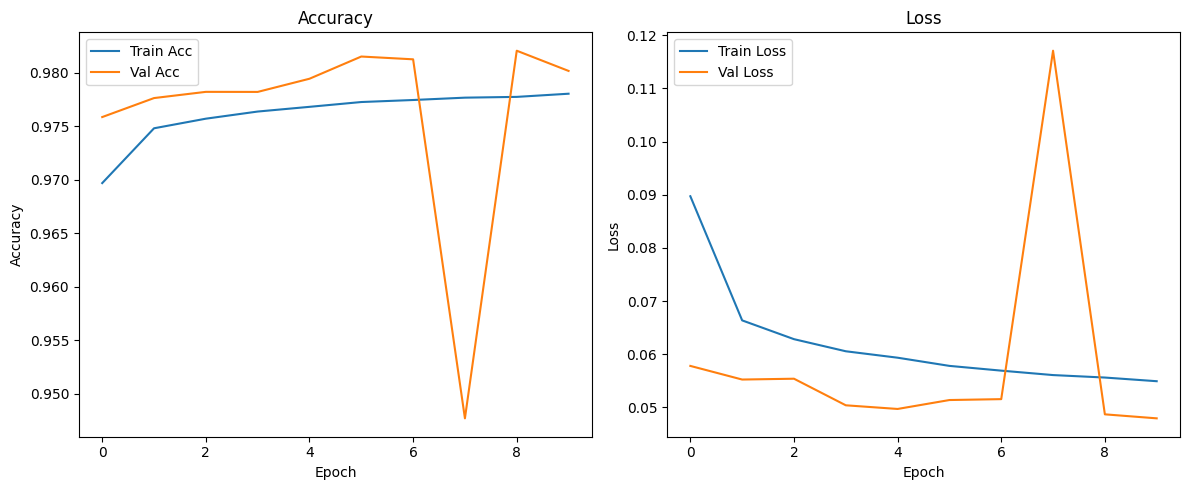

In [33]:
import matplotlib.pyplot as plt
import timeit

# Train the Model
start_time = timeit.default_timer()
history = model.fit(
    X_train, y_train,
    epochs=10, #15
    batch_size=64,
    validation_data=(X_val, y_val),
    verbose=1
)
end_time = timeit.default_timer()
print(f"Training time: {end_time - start_time:.2f} seconds")

# Plot accuracy and loss
plt.figure(figsize=(12,5)) # Create a new figure that is 12x5

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



# Evaluate 1D CNN Malware Detection Results

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Get predictions of x_test dataset
threshold = 0.5
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > threshold).astype(int).flatten()  # Convert probabilities to 0 or 1, 0.5 = Threshold

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: print as table
print("Confusion Matrix:")
print(cm)

# Detailed breakdown
tn, fp, fn, tp = cm.ravel()
print(f"\nTrue Negatives (Benign correctly classified): {tn}")
print(f"False Positives (Benign misclassified as malware): {fp}")
print(f"False Negatives (Malware missed): {fn}")
print(f"True Positives (Malware correctly identified): {tp}")

# Accuracy scores
print("Accuracy:")
print("sklearn Accuracy:", accuracy_score(y_test, y_pred))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)# Evaluate model with test set
print(f"model.evaluate Accuracy: {test_acc:.4f}")
print(f"Confusion Matrix Accuracy: {(tp + tn) / (tp + tn + fp + fn)}")
print(f"{(tp/(tp+fn))*100:.4f}% of malware identified")
print(f"{(fp/(fp+tn))*100:.4f}% of benign traffic incorrectly identified")

# Classification report (accuracy, precision, recall, F1)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Benign", "Malicious"]))

23633/23633 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step
Confusion Matrix:
[[626704   1814]
 [ 13648 114060]]

True Negatives (Benign correctly classified): 626704
False Positives (Benign misclassified as malware): 1814
False Negatives (Malware missed): 13648
True Positives (Malware correctly identified): 114060
Accuracy:
sklearn Accuracy: 0.9795537312919683
model.evaluate Accuracy: 0.9796
Confusion Matrix Accuracy: 0.9795537312919683
89.3131% of malware identified
0.2886% of benign traffic incorrectly identified

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99    628518
   Malicious       0.98      0.89      0.94    127708

    accuracy                           0.98    756226
   macro avg       0.98      0.95      0.96    756226
weighted avg       0.98      0.98      0.98    756226



#Visualisation of results

/tmp/ipython-input-35-2967908928.py:33: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



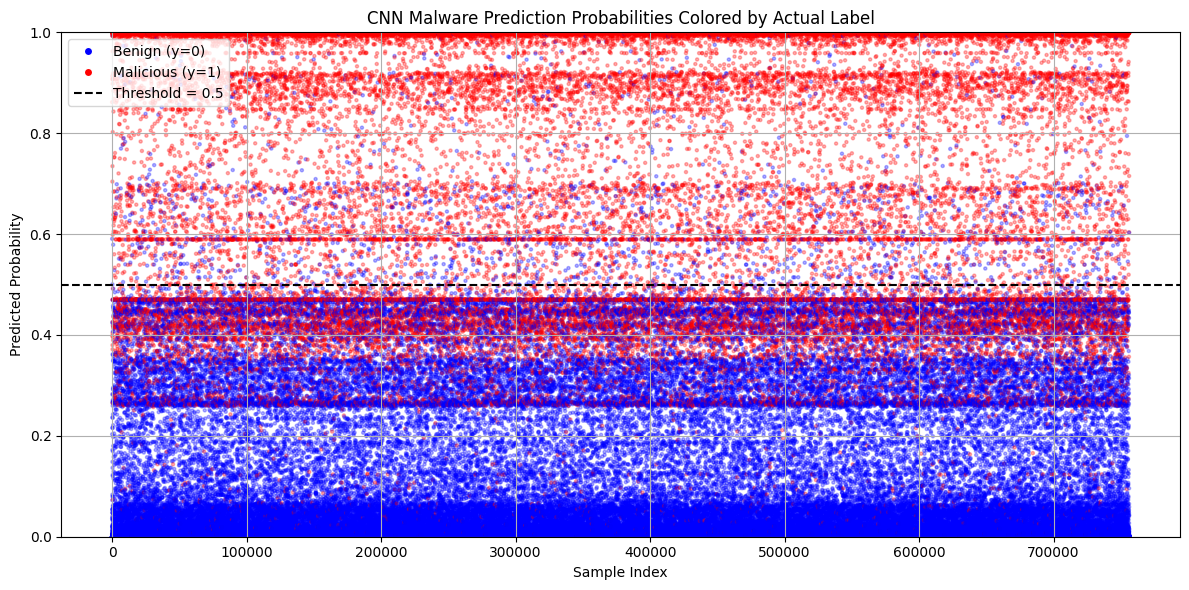

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# --- Plot CNN Prediction Probabilities ---
# Map actual labels to colors: red = malicious (1), blue = benign (0)
colors = np.where(y_test == 1, 'red', 'blue')

# X-axis = sample index
x_vals = np.arange(len(y_pred_probs))

# Plot predictions with color by actual label
plt.figure(figsize=(12, 6))
plt.scatter(x_vals, y_pred_probs, c=colors, alpha=0.3, s=5)
plt.axhline(y=threshold, color='black', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold}')

# Labels and styling
plt.ylim([0, 1])
plt.xlabel("Sample Index")
plt.ylabel("Predicted Probability")
plt.title("CNN Malware Prediction Probabilities Colored by Actual Label")

# Add custom legend
custom_lines = [
    plt.Line2D([0], [0], marker='o', color='w', label='Benign (y=0)', markerfacecolor='blue', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Malicious (y=1)', markerfacecolor='red', markersize=6),
    plt.Line2D([0], [0], color='black', lw=1.5, linestyle='--', label=f'Threshold = {threshold}')
]
plt.legend(handles=custom_lines)

plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-36-2269122754.py:36: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



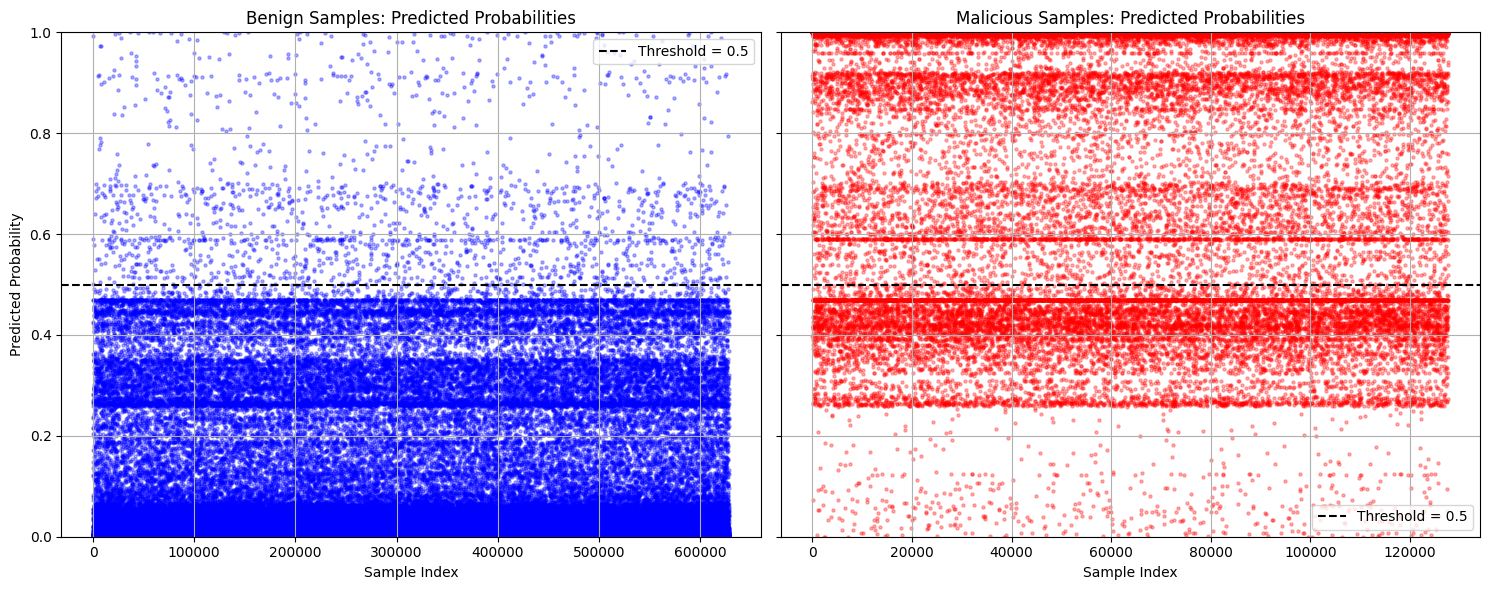

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Separate predictions based on actual labels
benign_indices = np.where(y_test == 0)[0]
malicious_indices = np.where(y_test == 1)[0]

benign_probs = y_pred_probs[benign_indices]
malicious_probs = y_pred_probs[malicious_indices]

benign_x = np.arange(len(benign_probs))
malicious_x = np.arange(len(malicious_probs))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Plot for Benign samples
axes[0].scatter(benign_x, benign_probs, c='blue', alpha=0.3, s=5)
axes[0].axhline(y=threshold, color='black', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold}')
axes[0].set_ylim([0, 1])
axes[0].set_xlabel("Sample Index")
axes[0].set_ylabel("Predicted Probability")
axes[0].set_title("Benign Samples: Predicted Probabilities")
axes[0].legend()
axes[0].grid(True)

# Plot for Malicious samples
axes[1].scatter(malicious_x, malicious_probs, c='red', alpha=0.3, s=5)
axes[1].axhline(y=threshold, color='black', linestyle='--', linewidth=1.5, label=f'Threshold = {threshold}')
axes[1].set_ylim([0, 1])
axes[1].set_xlabel("Sample Index")
axes[1].set_title("Malicious Samples: Predicted Probabilities")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()